In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import easyocr
import cv2
import matplotlib.pyplot as plt
import time

class Exec_Timer:
    def __init__(self, output=True, desc:str=""):
        if len(desc)>0: desc = desc + ":\t"
        self.desc = desc
        self.output = output
    def __call__(self):    
        return float(time.time()-self.start)
    def __enter__(self):    
        self.start = time.time()
        return self
    def __exit__(self,*args): 
        if self.output:
            print ("{}elapsed_time:{:.06f}".format(self.desc, time.time()-self.start)+"[sec]")
        return True

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(img)
    return fig, ax

In [2]:
reader = easyocr.Reader(['ja','en']) # 文字の選択一回だけでいい

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


elapsed_time:4.011323[sec]
['トップ', '速報', 'ライブ', 'エキスパート', 'オリジナル', 'みんなの意見', 'ランキング', '有料', '主要 | 国内 | 国際 | 織', 'エンタメ', 'スボーツ', '丁| 科学 | ライフ', '地域', 'トピックス一覧', 'まさかの 「EV開発徹退」', 'アップルが露星した"異業種参入"という', 'アクセスランキング 〔経済織合)', '名の巨大リスク', '小林製薬 「紅記_', '日本酒にせんぺ', 'い 豆真子まで', '止まらない"自主', '市田', '収ド三ノ"52の飲料や食品メ', '3/25(月) 14,11 配信', 'liilMerkmal', 'カーなどに影響拡大', 'MBsニュース 3 25月} 6,45', 'AI開発の遅れと課題', '2 繰り越した通帳ガ何飛もありま', '2024年2月27日', 'ブルームバーグ発の電気自動車', '引っ越しするので処分しても', 'いいでしょうか', 'すべて捨てても', '(EV) 業界を鷲かせるニユースが世界を駆け巡った。 そ', '大丈夫ですか', 'ファイナンシャルフィールド', 'れは; 2014年から多くの予算と人材を投入して開発を進', '3/2-〔日)19,10', 'めてきたアップルのEV開発計画が、 事実上白紙徹回され', '【小林製薬】', '「紅慧_', 'とは何か?', 'ることになつたというものだつた。', '一部原科ロットから 『未特定の物', '貨』 のピークを検出; 健康波害の', '原田力 2人は一時', '透析ガ必要', '【画像】', 'えつ…', 'これが6年前の 「海老名サービスエリ', 'MBsニュース 3 22[金} 18.21', 'ア」 です (計1枚〕', 'アップルカー', '〔画擬: バナラマ ア', '【低所得世帯へのI万円】 各自治', 'ップル】', '体で絵付スタート ! 1歳以下の子', 'どもー人につき 「5万円」 追加', '「タイタン」 と名付けられたアップルのオリジナルEV', 'LIMO 3 25月}7,26', 'は; EVであると同時に、 完全な無人運転を可能にするレベル4の自動運転を目指してい', '5 まさかの 

(<Figure size 900x600 with 1 Axes>, <AxesSubplot:>)

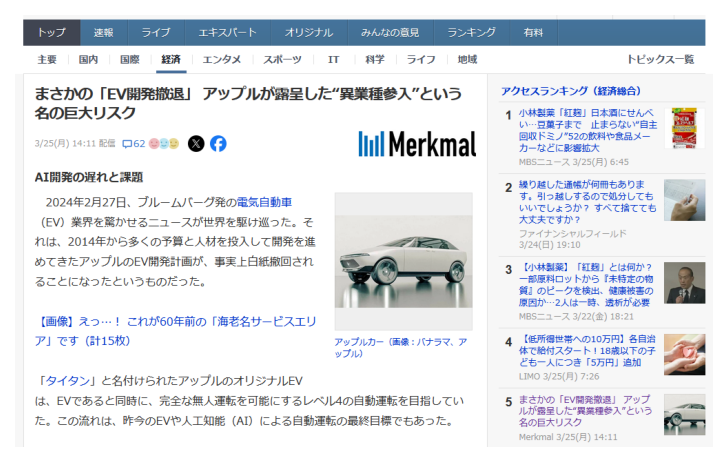

In [3]:
path = "../../sample_data/OCR_sample/ocr_sample.png"
img = cv2.imread(path)[:,:,::-1].copy()

with Exec_Timer():
    result_str = reader.readtext(img, detail=0) # 文章のみ

print(result_str)

show_img(img)

(628, 1013, 3)
(55, 623, 3)
elapsed_time:0.233001[sec]
['まさかの 「EV開発徹退」', 'アップルが露星した"異業種参入"という', '名の巨大リスク']
まさかの 「EV開発徹退」アップルが露星した"異業種参入"という名の巨大リスク


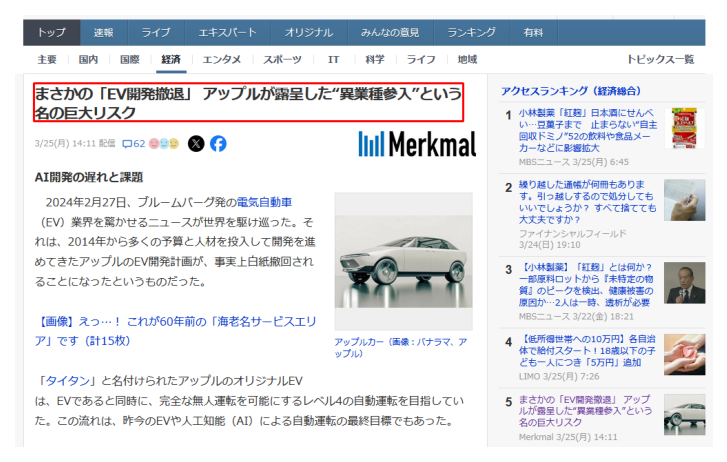

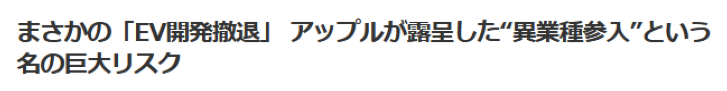

In [4]:
### 画像をトリミング
print(img.shape)

# トリミングする座標
bbox = [27, 100, 650, 155] # [x1, y1, x2, y2]
bbox_vis_img = cv2.rectangle(img.copy(), pt1=(bbox[0], bbox[1]), pt2=(bbox[2], bbox[3]), color=(255, 0, 0), thickness=2, lineType=cv2.LINE_8)
show_img(bbox_vis_img)

# トリミングとリサイズ
img_trim = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
img_trim = cv2.resize(img_trim, fx=1.0, fy=1.0, dsize=None)
print(img_trim.shape)
show_img(img_trim)

with Exec_Timer():
    result_str = reader.readtext(img_trim, detail=0) # 文章のみ
    
print(result_str)
print("".join(result_str))